Nombre total des points: 491


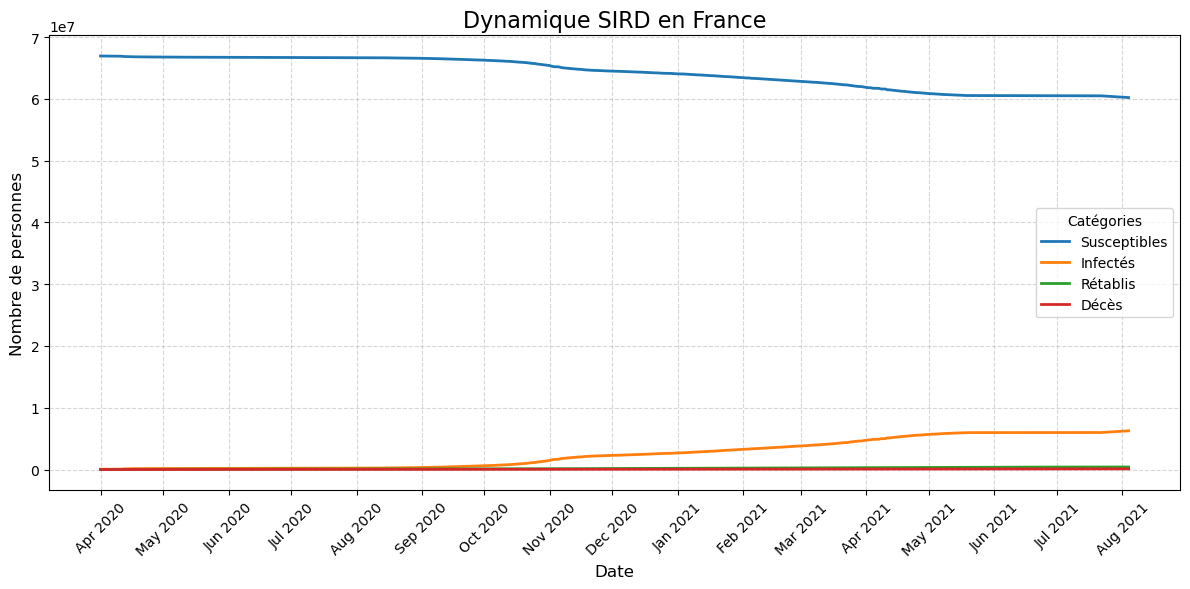

<Axes: title={'center': 'Décès'}, xlabel='date'>

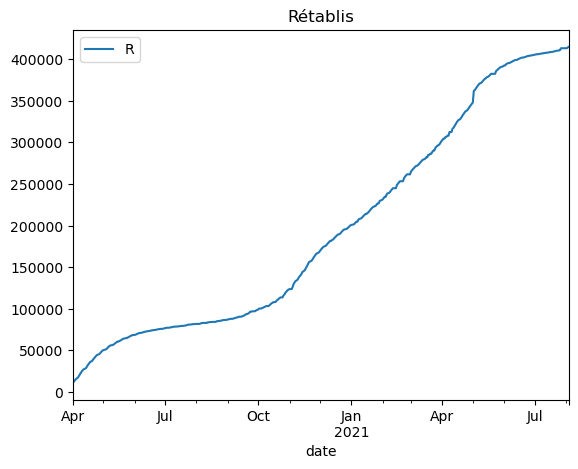

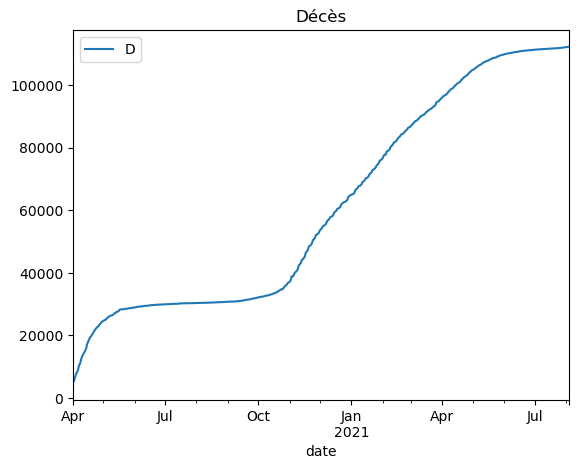

In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Pipeline personnalisé pour le traitement des données
from src.data import DataPipeline

# Chargement et traitement des données via le pipeline
pipeline = DataPipeline(population=67_000_000, country="France")
# Exécution du pipeline pour obtenir les données au format SIRD
df = pipeline.run()

print(f"Nombre total des points: {len(df)}")

# Tracé des courbes pour chaque catégorie SIRD
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["S"], label="Susceptibles", linewidth=2)
plt.plot(df["date"], df["I"], label="Infectés", linewidth=2)
plt.plot(df["date"], df["R"], label="Rétablis", linewidth=2)
plt.plot(df["date"], df["D"], label="Décès", linewidth=2)

# Formatage de l’axe des dates (axe X)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45)

# Titres
plt.title("Dynamique SIRD en France", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de personnes", fontsize=12)

# Légende et grille
plt.legend(title="Catégories")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Graphiques supplémentaires : rétablis et décès au fil du temps
df.plot(x="date", y=["R"], title="Rétablis")
df.plot(x="date", y=["D"], title="Décès")